In [62]:
import pandas as pd # DataFrame işlemleri yapabileceğimiz kütüphanemiz

from sklearn.preprocessing import StandardScaler #Skitlearn ML kütüphanesi
from sklearn.model_selection import train_test_split # train ve test ayırma aracı
import pickle # model kaydetme aracı
import numpy # matrix işlemleri modülü 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # keras sequential modeli
from keras.layers import Dense, Dropout # keras nn katman fonksiyonları
from keras.wrappers.scikit_learn import KerasClassifier #skitlearn classifier modeli

# Train ve Test verilerini ics üniversitesi websitesinden çekiyoruz

In [63]:
train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-train.data', header=None, sep=' ')

In [64]:
test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-test.data', header=None, sep=' ')

# Çektiğimiz verilere sütun isimlerini ekliyoruz 

In [65]:
column_list = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']
train = pd.DataFrame(train.iloc[:,0:22].values, columns=column_list)
test = pd.DataFrame(test.iloc[:,0:22].values, columns=column_list)

In [66]:
train # train verisetimizi inceleyelim

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00060,0.0150,0.120,0.082,0.146,3.0
1,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0300,0.143,0.133,0.108,3.0
2,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0240,0.102,0.131,0.078,3.0
3,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00090,0.0170,0.077,0.090,0.085,3.0
4,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0260,0.139,0.090,0.153,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,3.0
3768,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,3.0
3769,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.01300,0.0174,0.123,0.099,0.124,2.0
3770,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,3.0


In [67]:
test # test setimizi inceleyelim

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00610,0.0280,0.111,0.131,0.0850,2.0
1,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0190,0.084,0.078,0.1070,3.0
2,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0310,0.239,0.100,0.2390,3.0
3,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00100,0.0180,0.087,0.088,0.0990,3.0
4,0.22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00040,0.0220,0.134,0.135,0.0990,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00250,0.0208,0.079,0.099,0.0800,3.0
3424,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10600,0.0060,0.005,0.089,0.0055,1.0
3425,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00076,0.0201,0.090,0.067,0.1340,3.0
3426,0.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00280,0.0201,0.090,0.089,0.1010,3.0


In [68]:
train_X = train.drop(['Class'], axis=1)
train_y = train['Class']

In [69]:
test_X = test.drop(['Class'], axis=1) 
test_y = test['Class']

In [70]:
 X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_y, test_size = 0.2, random_state = 1)  

In [71]:
sc = StandardScaler()
#eğitim verisini ölçeklendirelim
X_train = sc.fit_transform(train_X)
        
#test verisive validation verisinide ölçeklendirelim
X_validation = sc.transform(X_validation)

In [72]:
def classifier_model():
        """Bu kod ile Neural agimin katmanlarini ve ozniteliklerini belirleyerek modelimi olusturuyorum.
        Genelde cogu ANN'de kullanilan Kerasin Sequential() methodu ile modelimi kuruyorum.
        Modelime 48 dense ekliyorum ve girdi boyutunu 21 olarak ayarliyorum.
        Bunun sebebi verilerimizin 21 kategoriden olusmasi. Her kategorik veriyi bir girdi neuronuna bagliyorum. 
        Aktivasyon fonksiyonu olarak ise Relu aktivasyon fonksiyonunu seciyorum.
        iki 48 lik ara hidden layer daha ekledikten  sonra cikti 
        katmanimi 3 layer olarak belirliyorum ve Aktivasyon fonksiyonunu softmax seciyorum.
        Softmax olasiliksal dagilim acisindan output katmaninda tam ihtiyacimiz olan araliga
        sahip ve olceklememize musait olan aktivasyon fonksiyonu oldugu icin bunu sectim.
        En son durumda modelimizi return ediyoruz
        Optimizeri adadelta olarak belirledim.

        """
        #Sequential model
        model = Sequential()
        
        #Girdi katmanı 21 boyutlu oluşturuyoruz
        model.add(Dense(48, kernel_initializer = 'uniform', input_dim=21, activation='relu'))
        
        #2. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        #3. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        # Çıkış katmanı
        model.add(Dense(3, kernel_initializer = 'uniform', activation='softmax'))
        
    	# Modeli oluşturuyoruz
        model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
        
        return model

In [73]:
#Keras classifier üzerinde modeli oluşturuyoruz
classifier = KerasClassifier(build_fn = classifier_model, batch_size = 10, epochs = 100)

In [74]:
sc = StandardScaler()
#eğitim verisini ölçeklendiriyoruz
train_X = sc.fit_transform(train_X)
        
#test verisini eğitim verisi ölçeğine uyduruyoruz
test_X = sc.transform(test_X)

In [75]:
history=classifier.fit(train_X, train_y, batch_size = 10, epochs = 100)

Epoch 1/100
378/378 [==============================] - 1s 643us/step - loss: 1.0984 - accuracy: 0.6373
Epoch 2/100
378/378 [==============================] - 0s 618us/step - loss: 1.0973 - accuracy: 0.9194
Epoch 3/100
378/378 [==============================] - 0s 614us/step - loss: 1.0960 - accuracy: 0.9244
Epoch 4/100
378/378 [==============================] - 0s 631us/step - loss: 1.0945 - accuracy: 0.9244
Epoch 5/100
378/378 [==============================] - 0s 613us/step - loss: 1.0929 - accuracy: 0.9247
Epoch 6/100
378/378 [==============================] - 0s 827us/step - loss: 1.0910 - accuracy: 0.9247
Epoch 7/100
378/378 [==============================] - 0s 775us/step - loss: 1.0890 - accuracy: 0.9247
Epoch 8/100
378/378 [==============================] - 0s 938us/step - loss: 1.0867 - accuracy: 0.9247
Epoch 9/100
378/378 [==============================] - 0s 642us/step - loss: 1.0842 - accuracy: 0.9247
Epoch 10/100
378/378 [==============================] - 0s 643us/step - l

378/378 [==============================] - 0s 680us/step - loss: 0.3118 - accuracy: 0.9247
Epoch 80/100
378/378 [==============================] - 0s 937us/step - loss: 0.3106 - accuracy: 0.9247
Epoch 81/100
378/378 [==============================] - 0s 663us/step - loss: 0.3095 - accuracy: 0.9247
Epoch 82/100
378/378 [==============================] - 0s 690us/step - loss: 0.3084 - accuracy: 0.9247
Epoch 83/100
378/378 [==============================] - 0s 595us/step - loss: 0.3075 - accuracy: 0.9247
Epoch 84/100
378/378 [==============================] - 0s 598us/step - loss: 0.3065 - accuracy: 0.9247
Epoch 85/100
378/378 [==============================] - 0s 595us/step - loss: 0.3057 - accuracy: 0.9247
Epoch 86/100
378/378 [==============================] - 0s 612us/step - loss: 0.3049 - accuracy: 0.9247
Epoch 87/100
378/378 [==============================] - 0s 634us/step - loss: 0.3041 - accuracy: 0.9247
Epoch 88/100
378/378 [==============================] - 0s 614us/step - loss:

In [76]:
def map_pred_class(preditions):
    """Predictions girdisini alir ve tahmin degerlerine gore Tiroit durumu normal mi , subnormal mi yoksa Hipertroid mi bunu belirler ve bastirir.
    """
    pred_map = ['Normal'  if(x==3) else 'Subnormal' if (x==2) else 'HyperThyroid'  for x in preditions]
    return numpy.array(pred_map)

Train verisi verimizi eğittik  ancak eğitimsel olarak ezbere sebebiyet verebileceği için eğitime sokmadığımız test kümemiz ilede test edelim. Bu sonuç gerçek dünya verisi olarak kabul edilebilir

In [77]:
# TEST VERISI ILE Prediction  (eğitime sokulmayan veri)
y_test_pred = classifier.predict(test_X)

#Confustion matrix from predictions
cm = confusion_matrix(test_y, y_test_pred)
#Map predictions to class name
y_test_pred = map_pred_class(y_test_pred)

print("\n............Predictions............\n")
print(y_test_pred.reshape(-1,1))
print("\Test Data - Accuracy is %.3f%% \n" % ((cm[0][0]+cm[1][1]+cm[2][2])*100/test_y.size))




............Predictions............

[['Normal']
 ['Normal']
 ['Normal']
 ...
 ['Normal']
 ['Normal']
 ['Normal']]
\Test Data - Accuracy is 92.707% 



In [78]:
#Eğitim Modelini Bilgisayarımıza kaydediyoruz

json_model = classifier.model.to_json() # JSON olarak ve
open('model_architecture.json', 'w').write(json_model) 
classifier.model.save_weights('model_weights.h5', overwrite=True) # h5 formatında
print("\nModel is saved..\n")


Model is saved..



In [79]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

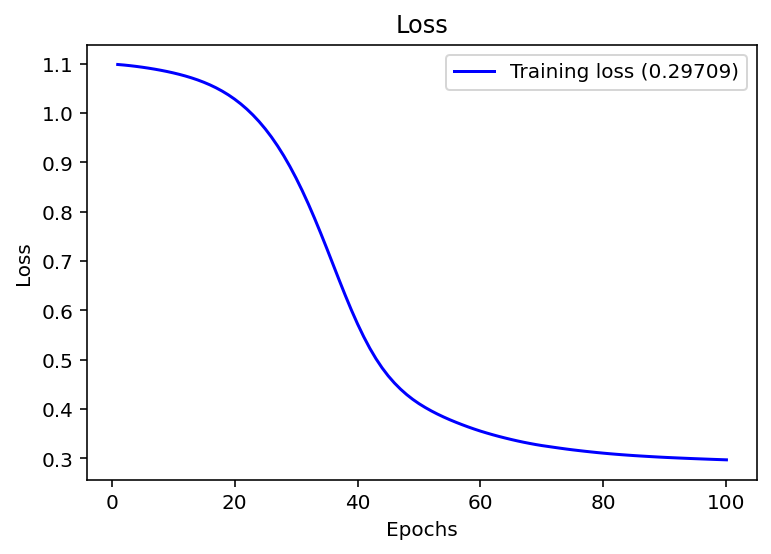

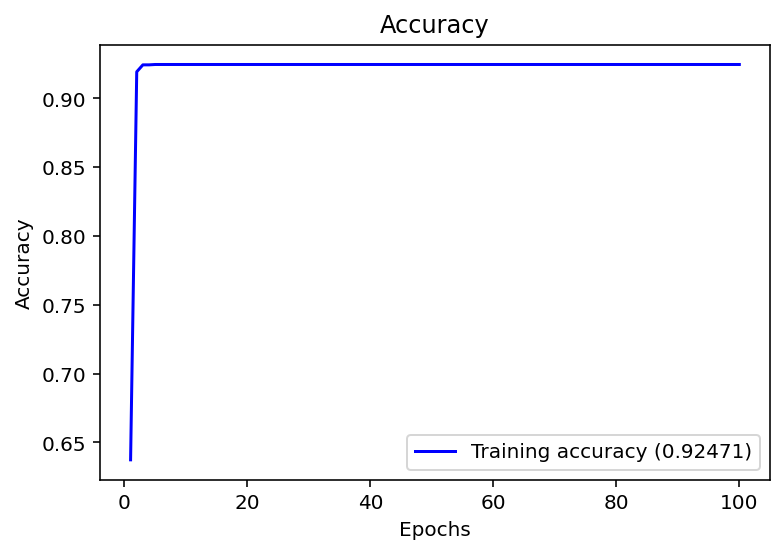

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plot_history(history)

# Gelişim

In [81]:
def new_classifier_model():
        """Bu kod ile Neural agimin katmanlarini ve ozniteliklerini belirleyerek modelimi olusturuyorum.
        Genelde cogu ANN'de kullanilan Kerasin Sequential() methodu ile modelimi kuruyorum. 
        Modelime 48 dense ekliyorum ve girdi boyutunu 21 olarak ayarliyorum.
        Bunun sebebi verilerimizin 21 kategoriden olusmasi. 
        Her kategorik veriyi bir girdi neuronuna bagliyorum. 
        Aktivasyon fonksiyonu olarak ise Relu aktivasyon fonksiyonunu seciyorum.
        Her katmandan sonra 0.25 lik bir Dropout ekliyorum. 
        Dropout eklememin sebebi modelimin veri setini
        ezberlemesinden kacindirmak yani her forward propagation asamasinda %0.25 lik veriyi unutuyorum 
        bu sayede validation gercek dunya verilerine daha guzel fit edebilicek.
        iki 48 lik ara hidden layer daha ekledikten  sonra cikti katmanimi 3 layer olarak belirliyorum 
        ve Aktivasyon fonksiyonunu softmax seciyorum.
        Softmax olasiliksal dagilim acisindan output katmaninda tam ihtiyacimiz olan araliga sahip ve
        olceklememize musait olan aktivasyon fonksiyonu oldugu icin bunu sectim.
        En son durumda modelimizi return ediyoruz

        OPTIMIZER = ADA MOMENTUM - (ADAM) olarak tercih ettim optimizer olarak gradyan momentinin güncel eğitimlerde
        daha optimize olduğunu gözlemledim
        """
        #Sequential model
        model = Sequential()
        
        #Girdi katmanı 21 boyutlu oluşturuyoruz
        model.add(Dense(48, kernel_initializer = 'uniform', input_dim=21, activation='relu'))
        
        #25% dropout ile neuronları öldürelim
        model.add(Dropout(0.25))
        
        #2. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        #25% dropout ile ezberlemeyi engelliyoruz
        model.add(Dropout(0.25))
        
        #3. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        #25% dropout 
        model.add(Dropout(0.25))
        
        # Çıkış katmanı
        model.add(Dense(3, kernel_initializer = 'uniform', activation='softmax'))
        
    	# Modeli oluşturuyoruz
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        return model

In [82]:
classifier = KerasClassifier(build_fn = new_classifier_model, batch_size = 10, epochs = 100)
new_history=classifier.fit(train_X, train_y, batch_size = 10, epochs = 100)


Epoch 1/100
378/378 [==============================] - 1s 709us/step - loss: 0.3051 - accuracy: 0.9223
Epoch 2/100
378/378 [==============================] - 0s 721us/step - loss: 0.1528 - accuracy: 0.9271
Epoch 3/100
378/378 [==============================] - 0s 711us/step - loss: 0.1258 - accuracy: 0.9467
Epoch 4/100
378/378 [==============================] - 0s 734us/step - loss: 0.1116 - accuracy: 0.9555
Epoch 5/100
378/378 [==============================] - 0s 815us/step - loss: 0.1005 - accuracy: 0.9594
Epoch 6/100
378/378 [==============================] - 0s 700us/step - loss: 0.0904 - accuracy: 0.9626
Epoch 7/100
378/378 [==============================] - 0s 721us/step - loss: 0.0910 - accuracy: 0.9629
Epoch 8/100
378/378 [==============================] - 0s 701us/step - loss: 0.0844 - accuracy: 0.9647
Epoch 9/100
378/378 [==============================] - 0s 704us/step - loss: 0.0820 - accuracy: 0.9658
Epoch 10/100
378/378 [==============================] - 0s 706us/step - l

378/378 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9934
Epoch 81/100
378/378 [==============================] - 0s 808us/step - loss: 0.0170 - accuracy: 0.9939
Epoch 82/100
378/378 [==============================] - 0s 779us/step - loss: 0.0126 - accuracy: 0.9950
Epoch 83/100
378/378 [==============================] - 0s 809us/step - loss: 0.0112 - accuracy: 0.9966
Epoch 84/100
378/378 [==============================] - 0s 761us/step - loss: 0.0205 - accuracy: 0.9936
Epoch 85/100
378/378 [==============================] - 0s 736us/step - loss: 0.0154 - accuracy: 0.9944
Epoch 86/100
378/378 [==============================] - 0s 736us/step - loss: 0.0142 - accuracy: 0.9950
Epoch 87/100
378/378 [==============================] - 0s 716us/step - loss: 0.0188 - accuracy: 0.9947
Epoch 88/100
378/378 [==============================] - 0s 724us/step - loss: 0.0139 - accuracy: 0.9942
Epoch 89/100
378/378 [==============================] - 0s 721us/step - loss: 0

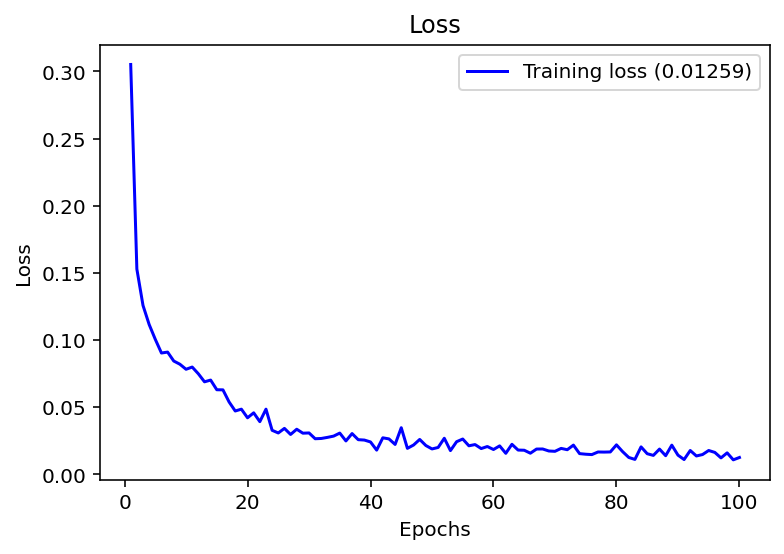

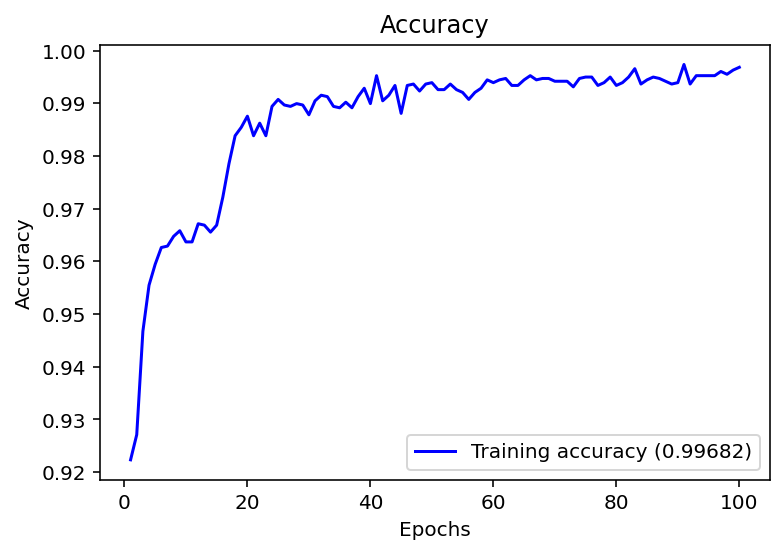

In [83]:

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plot_history(new_history)